In [2]:
import pandas as pd
import numpy as np
import requests
import re
from tqdm import tqdm
import torch

In [12]:
def get_html(url):
    r = requests.get(url)
    return r.text

In [15]:
text = get_html('https://www.ielts-practice.org/category/band-6-essay-samples/')
print(text)

<!DOCTYPE html><html class="no-js" lang="en-US"><head><meta charset="UTF-8"/>

<script src="https://privacy.gatekeeperconsent.com/tcf2_stub.js" data-cfasync="false"></script>

<script data-ezscrex='false' data-cfasync='false' data-pagespeed-no-defer>var __ez=__ez||{};__ez.stms=Date.now();__ez.evt={};__ez.script={};__ez.ck=__ez.ck||{};__ez.template={};__ez.template.isOrig=true;window.__ezScriptHost="//www.ezojs.com";__ez.queue=function(){var e=0,i=0,t=[],n=!1,o=[],s=[],r=!0,a=function(e,i,n,o,s,r,a){var l=arguments.length>7&&void 0!==arguments[7]?arguments[7]:window,c=this;this.name=e,this.funcName=i,this.parameters=null===n?null:p(n)?n:[n],this.isBlock=o,this.blockedBy=s,this.deleteWhenComplete=r,this.isError=!1,this.isComplete=!1,this.isInitialized=!1,this.proceedIfError=a,this.fWindow=l,this.isTimeDelay=!1,this.process=function(){f("... func = "+e),c.isInitialized=!0,c.isComplete=!0,f("... func.apply: "+e);var i=c.funcName.split("."),n=null,o=this.fWindow||window;i.length>3||(n=3===i

In [9]:
print(get_html('https://ieltswritingtips.com/category/band-6-5-ielts-essays/'))

<head><title>Not Acceptable!</title></head><body><h1>Not Acceptable!</h1><p>An appropriate representation of the requested resource could not be found on this server. This error was generated by Mod_Security.</p></body></html>


In [14]:
## find all positions of 'h2 class="post-title entry-title"' in text
positions = [m.start() for m in re.finditer('h2 class="post-title entry-title"', text)]
print(positions)

[85927, 87743, 89449, 91112, 92786, 94489, 96102, 97837, 99472, 101075]


In [18]:
loc_texts = []
for pos in positions:
    loc_text = text[pos:]
    find_1 = 'href="'
    loc_text = loc_text[loc_text.find(find_1)+len(find_1):]
    find_2 = '"'
    loc_text = loc_text[:loc_text.find(find_2)]
    loc_texts.append(loc_text)
loc_texts

['https://www.ielts-practice.org/some-people-say-that-the-best-way-to-reduce-the-time-spent-travelling-to-work-is-to-replace-parks-and-gardens-close-to-the-city-centre-with-apartment-buildings-band-6-ielts-essay-sample/',
 'https://www.ielts-practice.org/many-food-and-drinks-contain-high-levels-of-sugar-sugary-products-should-be-made-more-expensive-band-6-ielts-essay-sample/',
 'https://www.ielts-practice.org/throughout-history-people-have-dreamt-of-living-in-a-perfect-society-band-6-ielts-essay-sample/',
 'https://www.ielts-practice.org/the-growth-of-online-shopping-will-one-day-lead-to-all-shops-in-towns-and-cities-closing-band-6-ielts-essay-sample/',
 'https://www.ielts-practice.org/small-businesses-are-disappearing-and-being-replaced-by-large-multinational-companies-band-6-ielts-essay-sample/',
 'https://www.ielts-practice.org/some-people-believe-that-it-is-best-to-accept-a-bad-situation-band-6-essay-sample/',
 'https://www.ielts-practice.org/in-some-countries-more-and-more-people-

In [19]:
essay_text = get_html(loc_texts[0])
print(essay_text)

<!DOCTYPE html><html class="no-js" lang="en-US"><head><meta charset="UTF-8"/>

<script src="https://privacy.gatekeeperconsent.com/tcf2_stub.js" data-cfasync="false"></script>

<script data-ezscrex='false' data-cfasync='false' data-pagespeed-no-defer>var __ez=__ez||{};__ez.stms=Date.now();__ez.evt={};__ez.script={};__ez.ck=__ez.ck||{};__ez.template={};__ez.template.isOrig=true;__ez.queue=function(){var e=0,i=0,t=[],n=!1,o=[],s=[],r=!0,a=function(e,i,n,o,s,r,a){var l=arguments.length>7&&void 0!==arguments[7]?arguments[7]:window,c=this;this.name=e,this.funcName=i,this.parameters=null===n?null:p(n)?n:[n],this.isBlock=o,this.blockedBy=s,this.deleteWhenComplete=r,this.isError=!1,this.isComplete=!1,this.isInitialized=!1,this.proceedIfError=a,this.fWindow=l,this.isTimeDelay=!1,this.process=function(){f("... func = "+e),c.isInitialized=!0,c.isComplete=!0,f("... func.apply: "+e);var i=c.funcName.split("."),n=null,o=this.fWindow||window;i.length>3||(n=3===i.length?o[i[0]][i[1]][i[2]]:2===i.length

In [84]:
essay_text = get_html(loc_texts[5])
print(essay_text)

<!DOCTYPE html><html class="no-js" lang="en-US"><head><meta charset="UTF-8"/>

<script src="https://privacy.gatekeeperconsent.com/tcf2_stub.js" data-cfasync="false"></script>

<script data-ezscrex='false' data-cfasync='false' data-pagespeed-no-defer>var __ez=__ez||{};__ez.stms=Date.now();__ez.evt={};__ez.script={};__ez.ck=__ez.ck||{};__ez.template={};__ez.template.isOrig=true;__ez.queue=function(){var e=0,i=0,t=[],n=!1,o=[],s=[],r=!0,a=function(e,i,n,o,s,r,a){var l=arguments.length>7&&void 0!==arguments[7]?arguments[7]:window,c=this;this.name=e,this.funcName=i,this.parameters=null===n?null:p(n)?n:[n],this.isBlock=o,this.blockedBy=s,this.deleteWhenComplete=r,this.isError=!1,this.isComplete=!1,this.isInitialized=!1,this.proceedIfError=a,this.fWindow=l,this.isTimeDelay=!1,this.process=function(){f("... func = "+e),c.isInitialized=!0,c.isComplete=!0,f("... func.apply: "+e);var i=c.funcName.split("."),n=null,o=this.fWindow||window;i.length>3||(n=3===i.length?o[i[0]][i[1]][i[2]]:2===i.length

In [169]:
def par_split(text):
    text = re.sub(u'\xa0', ' ', text)
    text = re.sub('\n', ' ', text)
    text = re.sub(' +', ' ', text)
    text = re.sub('</p>', '\n', text)
    text = re.sub('<.*?>', '', text)
    text = re.sub(' +\n', '\n', text)
    text = re.sub('\n +', '\n', text)
    text = re.sub(' / ', ' or ', text)
    if len(text) == 0:
        return None
    if text[0] == '\n' or text[0] == ' ':
        text = text[1:]
    if text[-1] == '\n' or text[-1] == ' ':
        text = text[:-1]
    return text

In [170]:
def get_question_and_essay(essay_url):
    essay_text = get_html(essay_url)
    start_ess = '<div class="entry-inner">\n'
    start_par = '<p>'
    end_par = '</p>'
    end_mark = '          <nav class="pagination group">'
    essay_text = essay_text[:essay_text.find(end_mark)]
    # parsing qustion
    essay_text = essay_text[essay_text.find(start_ess)+len(start_ess):]
    essay_text = essay_text[essay_text.find('>') + 1:]
    if essay_text.find('<h') == -1:
        return None, None, None
    question = essay_text[:essay_text.find('<h')]
    question = question[:question.find('Here is')]
    # parsing band score
    essay_text = essay_text[essay_text.find('<h')+len('<h'):]
    essay_text = essay_text[essay_text.find('>') + 1:]
    if essay_text.find('Band') == -1:
        return None, None, None
    essay_text = essay_text[essay_text.find('Band') + 5:]
    band_score = float(re.split(' |\n', essay_text)[0])
    essay_text = essay_text[essay_text.find('>') + 1:]
    
    # parsing essay
    essay = essay_text
    if len(question) == 0 or len(essay) == 0:
        return None, None, None
    return par_split(question), par_split(essay), band_score

In [139]:
question, essay, score = get_question_and_essay(loc_texts[0])
print(question)
print(essay)
print(score)

Some people think that the best way to reduce the time spent travelling to work is to replace parks and gardens close to the city centre with apartment buildings for commuters, but others disagree. Discuss both views and give your own opinion.

Ever since the industrial revolution, travelling time to work had sparked heated debate in society. While there are residents who suggested replacing public entertaining areas is the best strategy to reduce time spent on travelling to work, others disagree with such a statement. In this essay, I will discuss both opinions along with examples of why I believe this indeed is not an effective strategy.

It is undeniable commuters spend a lot of time travelling to work daily. Therefore, if public areas such as parks and gardens are replaced by buildings for residency purposes, people who lived closer to the city would have saved a lot of personal time. Since the Covid-19 pandemic, many had begun to work from home, which had spared them their own tim

In [171]:
def parse_essays(page_url):
    text = get_html(page_url)
    positions = [m.start() for m in re.finditer('h2 class="post-title entry-title"', text)]
    loc_texts = []
    for pos in positions:
        loc_text = text[pos:]
        find_1 = 'href="'
        loc_text = loc_text[loc_text.find(find_1)+len(find_1):]
        find_2 = '"'
        loc_text = loc_text[:loc_text.find(find_2)]
        loc_texts.append(loc_text)
    questions = []
    essays = []
    marks = []
    for i, loc_text in enumerate(loc_texts):
        question, essay, mark = get_question_and_essay(loc_text)
        # print(i)
        if question is None:
            continue
        questions.append(question)
        essays.append(essay)
        marks.append(mark)
    return questions, essays, marks

In [101]:
parse_essays('https://www.ielts-practice.org/category/band-6-essay-samples/')

(['Some people think that the best way to reduce the time spent travelling to work is to replace parks and gardens close to the city centre with apartment buildings for commuters, but others disagree. Discuss both views and give your own opinion.',
  'Many Food And Drinks Contain High Levels Of Sugar. Sugary Products Should Be Made More Expensive | Agree Or Disagree IELTS Essay Sample',
  'Throughout history, people have dreamt of living in a perfect society. However, there is still no agreement about what a perfect society would be like. Why do people want to turn this dream into a reality? What can people do to help create an ideal society?',
  'The growth of online shopping will one day lead to all shops in towns and cities closing. Do you agree or disagree?',
  'Small businesses are disappearing and being replaced by large multinational companies. Do the advantages of this outweigh the disadvantages?',
  None,
  'In some countries, more and more people are becoming interested in fi

In [141]:
parse_essays('https://www.ielts-practice.org/category/sample-essays/page/47/')

(['People think that the best way to reduce crime is to give longer prison sentences. Others believe that there are other alternative solutions for reducing crime. Discuss both views and give your opinion on this topic.',
  '“Prevention is better than cure.” Researching and treating diseases is too costly so it would be better to invest in preventive measures. To what extent do you agree?',
  'More and more wild animals are on the verge of extinction and others are on endangered species list. What are the reasons for it? What can be done to solve this problem?',
  'Some people say that advertising encourages us to buy things that we really do not need. Others say that advertisements tell us about new products that may improve our lives.',
  'Nowadays many people complain that they have difficulties getting enough sleep. What problems can lack of sleep cause? What can be done about lack of sleep?',
  'Some people think it is good to raise children in a city. Others argue that it is bett

In [110]:
from tqdm import tqdm

In [172]:
def parse_all_essays(link, num_pages=100, start=1):
    questions = []
    essays = []
    marks = []
    for i in tqdm(range(start, num_pages + 1)):
        q, e, m = parse_essays(link + str(i))
        if len(q) == 0:
            break
        questions += q
        essays += e
        marks += m
    return questions, essays, marks

In [142]:
# parsing from main page
q, e, m = parse_all_essays('https://www.ielts-practice.org/category/sample-essays/page/')

 88%|████████▊ | 88/100 [06:49<00:55,  4.66s/it]


In [116]:
import pandas as pd

In [143]:
texts_df = pd.DataFrame({'question': q, 'essay': e, 'mark': m})
texts_df.head()

,question,essay,mark
0,"Exposure to international media such as films,...",It is irrefutable that the emergence of intern...,6.5
1,In the advertisement businesses nowadays usual...,"Of late, a large number of corporates depend o...",6.5
2,Some think increasing business and cultural co...,"Nowadays, the interaction between countries is...",7.5
3,In many countries paying for things using mobi...,"In this contemporary era, due to advancements ...",7.5
4,Wealthy nations should assist poorer countries...,It is argued that rich countries should help t...,6.5


In [161]:
# Parsing from band 6.0 page
q, e, m = parse_all_essays('https://www.ielts-practice.org/category/band-6-essay-samples/page/')
loc_df = pd.DataFrame({'question': q, 'essay': e, 'mark': m})
texts_df = pd.concat([texts_df, loc_df], ignore_index=True)
print(len(loc_df))

  1%|          | 1/100 [00:05<09:13,  5.59s/it]

8


In [162]:
# Parsing from band 7.0 page
q, e, m = parse_all_essays('https://www.ielts-practice.org/category/band-7-essay-samples/page/')
loc_df = pd.DataFrame({'question': q, 'essay': e, 'mark': m})
texts_df = pd.concat([texts_df, loc_df], ignore_index=True)
print(len(loc_df))

 53%|█████▎    | 53/100 [06:03<05:22,  6.86s/it]

474


In [167]:
# Parsing from band 8.0 page
q, e, m = parse_all_essays('https://www.ielts-practice.org/category/band-8-essay-samples/page/', 60, start=1)
loc_df = pd.DataFrame({'question': q, 'essay': e, 'mark': m})
texts_df = pd.concat([texts_df, loc_df], ignore_index=True)
print(len(loc_df))

100%|██████████| 60/60 [04:31<00:00,  4.52s/it]

594


In [173]:
# Parsing from band 8.0 page
q, e, m = parse_all_essays('https://www.ielts-practice.org/category/band-8-essay-samples/page/', 120, start=61)
loc_df = pd.DataFrame({'question': q, 'essay': e, 'mark': m})
texts_df = pd.concat([texts_df, loc_df], ignore_index=True)
print(len(loc_df))

 73%|███████▎  | 44/60 [04:42<01:42,  6.42s/it]

436


In [175]:
# Parsing from band 9.0 page
q, e, m = parse_all_essays('https://www.ielts-practice.org/category/band-9-ielts-essays/page/')
loc_df = pd.DataFrame({'question': q, 'essay': e, 'mark': m})
texts_df = pd.concat([texts_df, loc_df], ignore_index=True)
print(len(loc_df))

 35%|███▌      | 35/100 [03:49<07:06,  6.56s/it]

307


In [176]:
len(texts_df)

2701

In [177]:
# Removing duplicates
texts_df = texts_df.drop_duplicates()

In [178]:
len(texts_df)

2664

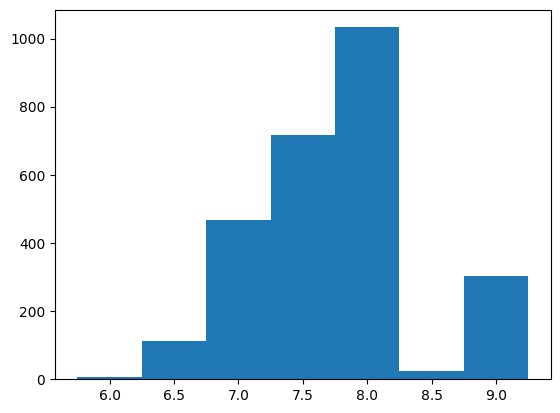

In [179]:
import matplotlib.pyplot as plt
# Getting dataset marks distribution
mark_values = texts_df['mark'].value_counts()
mark_values = mark_values.sort_index()
# Plotting marks distribution
plt.bar(mark_values.index, mark_values.values, width=0.5)
plt.show()

In [185]:
texts_df.to_csv('texts.csv', index=False)

In [4]:
file_path = '/kaggle/input/essaysielts/texts.csv'
texts_df = pd.read_csv(file_path, sep=',')

In [5]:
for i in range(len(texts_df)):
    bad_sentence = 'Do you have an essay on this topic?'
    texts_df.iloc[i, 1] = texts_df.iloc[i, 1][:texts_df.iloc[i, 1].find(bad_sentence)]

In [6]:
# Splitting dataset into train and test
# 5% of dataset will be used for testing
# we will split with stratification by marks
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(texts_df, test_size=0.05, stratify=texts_df['mark'])
len(train_df), len(test_df)

(2530, 134)

In [7]:
train_df['mark'].value_counts(), test_df['mark'].value_counts()

(8.0    981
 7.5    682
 7.0    442
 9.0    289
 6.5    105
 8.5     23
 6.0      8
 Name: mark, dtype: int64,
 8.0    52
 7.5    36
 7.0    24
 9.0    15
 6.5     6
 8.5     1
 Name: mark, dtype: int64)

In [8]:
def ielts_to_labels(mark):
    marks = [6.0, 6.5, 7.0, 7.5, 8.0, 8.5, 9.0]
    for i, m in enumerate(marks):
        if mark <= m:
            return i
        
def labels_to_ielts(label):
    marks = [6.0, 6.5, 7.0, 7.5, 8.0, 8.5, 9.0]
    return marks[label]

In [9]:
train_df['label'] = train_df['mark'].apply(ielts_to_labels)
test_df['label'] = test_df['mark'].apply(ielts_to_labels)

## Построение датасета для обучения модели

In [9]:
from torch.utils.data import Dataset, DataLoader
import torch
from transformers import BertForSequenceClassification, BertTokenizer, AdamW, get_linear_schedule_with_warmup

In [10]:
tokenizer = BertTokenizer.from_pretrained('bert-base-cased', max_length=512, do_lower_case=False, padding_side='right', truncation=True, padding='max_length')

In [11]:
sample_question = train_df['question'].iloc[0]
sample_essay = train_df['essay'].iloc[0]

text = sample_question + ' [SEP] ' + sample_essay

print(text)

print(tokenizer(sample_essay, truncation=True, padding='max_length'))

#print(tokenizer.convert_tokens_to_ids(tokenizer.tokenize(sample_essay)).shape)


Some people think that schools should educate pupils according to their academic ability, and others believe pupils with different abilities should be educated together. Discuss both views and give your opinion. [SEP] According to some people, it is better to educate students of different academic caliber together whereas others insist that students should be grouped on the basis of their learning abilities. In my opinion, it is important to teach all students together.
People who argue that there should be separate classes for bright and slow students believe that this segregation improves the performance of both groups. There is certainly a grain of truth in this argument. When all the students in a class are of the same academic caliber, it is easier for teachers to finish the lessons. This is beneficial for academically brilliant students as they do not have to waste their time waiting for other students to catch up. This arrangement can be beneficial for slow learners too. Teacher

In [12]:
class EssayIELTSDataset(Dataset):
    def __init__(self, df, tokenizer, max_len=512):
        # the layout of csv_file is: question, essay, mark
        self.data = df

        self.tokenizer = tokenizer
        self.max_len = max_len
    
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, idx):
        '''
        We should concatenate question and essay into one string using
        [SEP] token as a separator
        '''
        if torch.is_tensor(idx):
            idx = idx.tolist()
        
        question = self.data['question'].iloc[idx]
        essay = self.data['essay'].iloc[idx]
        mark = self.data['mark'].iloc[idx]

        text = question + ' [SEP] ' + essay

        encoded = self.tokenizer(
            text,
            truncation=True, 
            padding='max_length'
        )

        token = torch.tensor(encoded['input_ids'])
        mask = torch.tensor(encoded['attention_mask'])
        label = torch.tensor(mark)
        #print(token.shape, mask.shape)

        return token, mask, label

In [13]:
dataset_train = EssayIELTSDataset(train_df, tokenizer)
dataset_test = EssayIELTSDataset(test_df, tokenizer)

loader_train = DataLoader(dataset_train, batch_size=2, shuffle=True, drop_last=False)
loader_test = DataLoader(dataset_test, batch_size=2, shuffle=True, drop_last=False)

## Fine-tuning BERT

In [14]:
model = BertForSequenceClassification.from_pretrained("bert-base-cased",
                                                      max_length=512)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
#device = torch.device("cpu")
model.to(device)

Some weights of the model checkpoint at bert-base-cased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at b

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(28996, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, element

In [126]:
class AESIELTSRegressor(torch.nn.Module):
    def __init__(self, model_name='bert-base-cased', drop_rate=0.2):
        super(AESIELTSRegressor, self).__init__()
        self.bert = BertForSequenceClassification.from_pretrained("bert-base-cased",
                                                                  max_length=512,
                                                                  output_hidden_states=False)
        self.regressor = torch.nn.Sequential(
            torch.nn.Dropout(drop_rate),
            torch.nn.Linear(768, 1)
        )
    
    def forward(self, token, attention_mask):
        output = self.bert(token, attention_mask=attention_mask)
        print(output)
        output = self.regressor(output[1])
        return output

In [127]:
model = AESIELTSRegressor()
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)

Some weights of the model checkpoint at bert-base-cased were not used when initializing BertForSequenceClassification: ['cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at b

In [128]:
optimizer = AdamW(model.parameters(), lr=2e-5)

In [129]:
def train_step(model, optimizer, loader, criterion, device):
    model.train()
    total_loss = 0
    for token, mask, label in tqdm(loader, desc='Training'):
        token = token.to(device)
        mask = mask.to(device)
        label = label.to(device)
        optimizer.zero_grad()
        output = model(token, mask)
        loss = criterion(output, label)
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
        optimizer.step()
        total_loss += loss.item()
    return total_loss / len(loader)

In [130]:
def test_step(model, loader, criterion, device):
    model.eval()
    total_loss = 0
    for token, mask, label in tqdm(loader, desc='Testing'):
        token = token.to(device)
        mask = mask.to(device)
        label = label.to(device)
        output = model(token, mask)
        loss = criterion(output, label)
        loss.backward()
        total_loss += loss.item()
    return total_loss / len(loader)

In [131]:
def train(model, optimizer, loader_train, loader_test, criterion, device, epochs=5):
    for epoch in range(epochs):
        print(f'Epoch {epoch+1} of {epochs}')
        print('-' * 10)
        train_loss = train_step(model, optimizer, loader_train, criterion, device)
        print(f'Train loss {train_loss}')
        test_loss = test_step(model, loader_test, criterion, device)
        print(f'Test loss {test_loss}')
        print()

In [132]:
loss = torch.nn.MSELoss()

In [133]:
train(model, optimizer, loader_train, loader_test, loss, device, epochs=5)

Epoch 1 of 5
----------


Training:   0%|          | 0/1265 [00:00<?, ?it/s]

SequenceClassifierOutput(loss=None, logits=tensor([[-0.0770, -0.1853],
        [-0.3238, -0.1082]], device='cuda:0', grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)


IndexError: tuple index out of range

### По результатам получилось, что данная модель обучается долго и скорее всего переобучается из-за большого числа параметров. Попробуем использовать меньшую версию и более  оптимальный алгоритм обучения. 

In [10]:
from datasets import Dataset

In [11]:
torch.cuda.empty_cache()

In [12]:
from transformers import DistilBertForSequenceClassification, DistilBertTokenizer

tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-cased', max_length=512, do_lower_case=False, padding_side='right', padding='max_length')
model = DistilBertForSequenceClassification.from_pretrained('distilbert-base-cased', max_length=512, num_labels=1)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)

Some weights of the model checkpoint at distilbert-base-cased were not used when initializing DistilBertForSequenceClassification: ['vocab_layer_norm.weight', 'vocab_projector.bias', 'vocab_layer_norm.bias', 'vocab_projector.weight', 'vocab_transform.bias', 'vocab_transform.weight']
- This IS expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-cased and are newly initialized: ['classifier.weight', 'pre_classifier.weight', 'classifier.b

In [13]:
# create Dataset from pandas DataFrame
enc_train = train_df.copy()
enc_test = test_df.copy()
enc_train['label'] = enc_train['mark']
enc_test['label'] = enc_test['mark']
enc_train = Dataset.from_pandas(enc_train)
enc_test = Dataset.from_pandas(enc_test)

enc_train = enc_train.map(lambda x: tokenizer(x['essay'], x['question'], padding='max_length', truncation=True), batched=True, batch_size=1000)
enc_test = enc_test.map(lambda x: tokenizer(x['essay'], x['question'], padding='max_length', truncation=True), batched=True, batch_size=1000)

  0%|          | 0/3 [00:00<?, ?ba/s]

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pai

  0%|          | 0/1 [00:00<?, ?ba/s]

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pai

In [14]:
pd.DataFrame(enc_train)

,question,essay,mark,label,__index_level_0__,input_ids,attention_mask
0,"In many places, new homes are needed, but the ...",It is considered by some that in spite of the ...,8.0,8.0,1994,"[101, 1135, 1110, 1737, 1118, 1199, 1115, 1107...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
1,An increasing number of schools provide tablet...,"Many schools are using technological gadgets, ...",8.0,8.0,1721,"[101, 2408, 2126, 1132, 1606, 12675, 176, 3556...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
2,Some people think that the most important thin...,Some people argue that the significant part of...,6.5,6.5,133,"[101, 1789, 1234, 6982, 1115, 1103, 2418, 1226...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
3,"For some people, shopping is not just about bu...",The way people shop has changed nowadays. Shop...,6.5,6.5,69,"[101, 1109, 1236, 1234, 4130, 1144, 2014, 2014...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
4,Some people think government should focus on r...,"No doubt, people’s health is influenced by the...",9.0,9.0,2512,"[101, 1302, 4095, 117, 1234, 787, 188, 2332, 1...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
...,...,...,...,...,...,...,...
2525,Studies show that crime rates are lower among ...,"According to some studies, the crime rates amo...",7.5,7.5,418,"[101, 1792, 1106, 1199, 2527, 117, 1103, 3755,...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
2526,Labour-saving devices such as dishwashers and ...,Our lives are thought to be made easier by app...,8.0,8.0,1604,"[101, 3458, 2491, 1132, 1354, 1106, 1129, 1189...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
2527,Online currencies have become more common in r...,The practice of paying for products and servic...,9.0,9.0,2361,"[101, 1109, 2415, 1104, 6573, 1111, 2982, 1105...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
2528,"In some countries, most people prefer to rent ...","In many countries, residents still prefer to o...",8.0,8.0,2172,"[101, 1130, 1242, 2182, 117, 3159, 1253, 9353,...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."


In [19]:
from transformers import Trainer, TrainingArguments

training_args = TrainingArguments(
    output_dir = '/aes-ielts',
    do_train = True,
    do_eval = True,
    num_train_epochs = 5,
    per_device_train_batch_size = 4,
    per_device_eval_batch_size = 4,
    warmup_steps = 100,
    weight_decay = 0.01,
    logging_dir = './logs',
    logging_steps = 10,
    evaluation_strategy = 'epoch',
    save_strategy = 'epoch',
    fp16 = True,
    load_best_model_at_end = True
)

In [20]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

from scipy.stats import pearsonr, spearmanr

def compute_metrics(pred):
    preds, labels = np.squeeze(pred.predictions), pred.label_ids
    return {'rmse': np.sqrt(mean_squared_error(labels, preds)),
            'mae': mean_absolute_error(labels, preds),
            'pearson': pearsonr(labels, preds)[0],
            'spearman': spearmanr(labels, preds)[0]}

In [21]:
trainer = Trainer(
    model = model,
    args = training_args,
    train_dataset = enc_train,
    eval_dataset = enc_test,
    compute_metrics = compute_metrics,
    tokenizer = tokenizer
)

In [26]:
trainer.train()

Epoch,Training Loss,Validation Loss,Rmse,Mae,Pearson,Spearman
1,0.255200,0.321093,0.566651,0.450764,0.589176,0.456124
2,0.177800,0.294501,0.542680,0.435518,0.542826,0.417708
3,0.206700,0.362768,0.602302,0.474085,0.565797,0.481382
4,0.175200,0.419112,0.647389,0.520493,0.572773,0.457749
5,0.090600,0.317790,0.563729,0.452221,0.558349,0.452033


TrainOutput(global_step=3165, training_loss=0.20857222257255567, metrics={'train_runtime': 443.94, 'train_samples_per_second': 28.495, 'train_steps_per_second': 7.129, 'total_flos': 1678332009768960.0, 'train_loss': 0.20857222257255567, 'epoch': 5.0})

In [27]:
# Making sanity check
question = test_df['question'].iloc[0]
essay = test_df['essay'].iloc[0]
mark = test_df['mark'].iloc[0]

print(f'Question: {question}')
print(f'Essay: {essay}')

encoding = tokenizer(question, essay, return_tensors='pt', padding=True, truncation=True, max_length=512)
input_ids = encoding['input_ids'].to(device)
attention_mask = encoding['attention_mask'].to(device)

output = model(input_ids, attention_mask)
print(f'Predicted mark: {output[0].item()}')
print(f'Actual mark: {mark}')


Question: Some people think it’s better to choose friends who always have the same opinions as them. Other people believe it’s good to have friends who sometimes disagree with them. Discuss both these views and give your own opinion.
Essay: According to some people, it is always good for us to choose friends who share our likes and dislikes. Others opine that it is better to choose friends who disagree with us occasionally. In my opinion, we should have friends who sometimes agree and sometimes disagree with us.
Some people think it is good to have friends who have the same thought processes and likes and dislikes as them. It would help in taking decisions easily without much difference of opinion or conflict of interest. Friends with similar interests would usually be in sync in most situations and the relationship is easy going. For instance, if one has a set of friends who all prefer beach destinations, the travel plans become easier. Also, if everyone has a similar opinion on caree

In [28]:
# Making sanity check
question = test_df['question'].iloc[10]
essay = test_df['essay'].iloc[10]
mark = test_df['mark'].iloc[10]

print(f'Question: {question}')
print(f'Essay: {essay}')

encoding = tokenizer(question, essay, return_tensors='pt', padding=True, truncation=True, max_length=512)
input_ids = encoding['input_ids'].to(device)
attention_mask = encoding['attention_mask'].to(device)

output = model(input_ids, attention_mask)
print(f'Predicted mark: {output[0].item()}')
print(f'Actual mark: {mark}')


Question: Many management interviews are based around assessing not only a person’s level of experience and knowledge but also their personality. Is leadership an innate skill? What other characteristics do companies look for in a manager?
Essay: Recruiters consider the applicant’s personality while selecting them for managerial roles. Leadership, good communication skills, empathy and good manners are a few important characteristics that companies expect from a manager. In my opinion, leadership is an acquired skill due to the reasons outlined below.
Nobody is born with the skill or talent to lead a group of people or a community. Experience from our lives helps us to learn and become a good leader. Taking initiatives and helping the group in various tasks and becoming a role model for them is possible only through repetitive practice. It is rare for a newbie to be successful in the first few attempts. For instance, Mahatma Gandhi was a remarkable leader and from his autobiography we 

In [29]:
# Для интереса проверим оценку моего же эссе
question = '''
Young people who commit crimes should be treated the same as adults by the authorities.
To what extent do you agree or disagree?
'''
essay = '''
It is a common opinion that everyone should look the same in the eye of justice. However, it is my firm belief that adolescents should not be punished the same as adults by the law. This is because of their immaturity, negative effect of their surroundings, and underdeveloped intellect. 
Firstly, young people are unable to comprehend the consequences of their actions. Children tend to do whatever they want without critically thinking about the results of their doings. As an example, one of the most common juvenile crimes is larceny. Children may steal money or products from a store unaware of the repercussions. For this reason, the punishment should be less strict compared to a one for an adult who is fully aware of their actions.
Another compelling reason to support my view is that children commit crimes because of negative influence of their environment. Adolescents misbehave because they learnt to do it from older people. Young persons develop their character by observing their role models such as parents and trying to copy them. If a child is growing up in a community that disregards law, it is very likely that they will learn to exhibit unlawful behaviour. As a result, instead of punishing juveniles, their community such as parents should be held responsible.
Finally, if to impose severe penalties on children as on adults, it will ruin their entire future. According to a recent research, a child’s brain development is most active before the age of 18. Therefore, it is vitaly important for a young person to attend an educational institution to learn crucial skills. Imprisoning a juvenile may prevent them from studying and, therefore, has detrimental effects on their future lives. For this reason, an alternative type of punishment such as community service must be used to handle crimes done by minors.
In summary, all crimes must be held accounted for, However, every social group should receive an appropriate type of penalty. That is, punishments for juveniles should not be severe as for adults because it can significantly damage their lives. 
'''

encoding = tokenizer(question, essay, return_tensors='pt', padding=True, truncation=True, max_length=512)
input_ids = encoding['input_ids'].to(device)
attention_mask = encoding['attention_mask'].to(device)

output = model(input_ids, attention_mask)
print(f'Predicted mark: {output[0].item()}')

Predicted mark: 7.732183933258057


In [30]:
# Проверим эссе моего друга)
question = '''
Young people who commit crimes should be treated the same as adults by the authorities.
To what extent do you agree or disagree?
'''
essay = '''
Nowadays, amount of crimes committed all over the world is decreasing, thus it is thought young people’s punishment for crimes should not differ from adults’ punishment. Were I asked about such suggestions, I would definitely decline all of them because of several reasons.
Firstly, teenagers often do not understand the consequences of their actions. The younger people can be easily manipulated by the older ones. Such manipulations can lead to the court’s mistake, resulting in imprisonment of the wrong person. There are well-known examples, such as the Georgetown experiment, that shows how easily young people are ruled by more experienced  adults. 
Secondly, young criminals’ adoption to life after prison can be dramatically harder than adults’. This happens because while being in prison, the learning process is violated or even stopped, and proper education is essential for finding a nice job, and, therefore, socialization. On the other hand, adults mostly have families and friends, which can help them to resocialize.
Lastly, the guilt of teenagers often belongs to their parents. If all parents had paid more attention to their children, there would have been much less crimes committed by youngsters. With the lack of control and positive examples of parents’ communication, teenagers find their replacement in criminal groups. This situation can be observed in poor countries of Africa and Latin America, where parents cannot participate in their children’s lives.
Summarizing, teenagers who commit crimes should not be treated as strictly as adults, because youngsters often do not realize what they are doing, and if treated similarly to older criminals, have less chances to return to normal life.
'''

encoding = tokenizer(question, essay, return_tensors='pt', padding=True, truncation=True, max_length=512)
input_ids = encoding['input_ids'].to(device)
attention_mask = encoding['attention_mask'].to(device)

output = model(input_ids, attention_mask)
print(f'Predicted mark: {output[0].item()}')

Predicted mark: 7.546204566955566


In [31]:
# Эссе еще одного друга
question = '''
Young people who commit crimes should be treated the same as adults by the authorities.
To what extent do you agree or disagree?
'''
essay = '''
Being less conscious than adults, young people often misjudge the consequences of their actions.They could commit a crime without realizing the flaws behind it, because children are not developed in understanding long-term perspective. It is therefore reasonable to make a lighter punishment on young people, compared to adults.
Moreover, guilt of a crime partly lies on the forester. This is because the behavior of the juveniles strongly depends on the environment they lived in, including parents, teachers, friends and neighbors. Thus, it is almost impossible to estimate the child’s guilt correctly, without realizing the context of his or her life.
In addition, young people are unable to rehabilitate after the punishment. Losing even several months of life could be crucial in a child’s life and education, because a child’s development has to be continuous; it affects a young person’s mind, character and personality. Being under arrest will certainly become childhood trauma.It is therefore reasonable to cancel a child’s arrest to avoid future problems in teenager’s personality development.
In summary, children are unable to understand the world on the same level of objectivity as adults. At the same time, their behavior is based mostly on their feelings and environment. Therefore, the juvenile justice system has to differ in plenty of ways.
'''

encoding = tokenizer(question, essay, return_tensors='pt', padding=True, truncation=True, max_length=512)
input_ids = encoding['input_ids'].to(device)
attention_mask = encoding['attention_mask'].to(device)

output = model(input_ids, attention_mask)
print(f'Predicted mark: {output[0].item()}')

Predicted mark: 7.322418689727783


In [24]:
## Saving model to HF
from huggingface_hub import notebook_login
notebook_login()



In [45]:
trainer.push_to_hub("aes-ielts")
tokenizer.push_to_hub("aes-ielts")

CommitInfo(commit_url='https://huggingface.co/tkharisov7/aes-ielts/commit/386710b03bb536587fd445629fecf66c3ee992db', commit_message='Upload tokenizer', commit_description='', oid='386710b03bb536587fd445629fecf66c3ee992db', pr_url=None, pr_revision=None, pr_num=None)

In [46]:
model.push_to_hub("aes-ielts")

Upload 1 LFS files:   0%|          | 0/1 [00:00<?, ?it/s]

pytorch_model.bin:   0%|          | 0.00/263M [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/tkharisov7/aes-ielts/commit/e0a209578e2e2c91ca97adba66063ed1a7d9afc6', commit_message='Upload DistilBertForSequenceClassification', commit_description='', oid='e0a209578e2e2c91ca97adba66063ed1a7d9afc6', pr_url=None, pr_revision=None, pr_num=None)

In [71]:
! git fetch origin

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 4 (delta 1), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (4/4), 595 bytes | 595.00 KiB/s, done.
From https://huggingface.co/tkharisov7/aes-ielts
   500fdc3..e0a2095  main       -> origin/main


In [33]:
while True:
    continue

KeyboardInterrupt: 

In [11]:
# Creating a pipeline for inference
from transformers import Pipeline

class AESIELTSPipeline(Pipeline):
    def _sanitize_parameters(self, **kwargs):
        return kwargs, {}, {}

    def preprocess(self, inputs):
        question, essay = inputs
        encoding = self.tokenizer(question, essay, return_tensors='pt', padding='max_length', truncation=True, max_length=512)
        input_ids = encoding['input_ids'].to(device)
        attention_mask = encoding['attention_mask'].to(device)
        return {'input_ids': input_ids, 'attention_mask': attention_mask}
    
    def _forward(self, input):
        output = self.model(**input)
        return output[0].item()
    
    def postprocess(self, output):
        return output

In [12]:
from transformers.pipelines import PIPELINE_REGISTRY
from transformers import DistilBertForSequenceClassification

PIPELINE_REGISTRY.register_pipeline(
    "aes-ielts",
    AESIELTSPipeline,
    pt_model=DistilBertForSequenceClassification
)

aes-ielts is already registered. Overwriting pipeline for task aes-ielts...


In [13]:
from transformers import pipeline
classifier = pipeline("aes-ielts", model="tkharisov7/aes-ielts")

In [19]:
question = '''
Young people who commit crimes should be treated the same as adults by the authorities.
To what extent do you agree or disagree?
'''
essay = '''
Being less conscious than adults, young people often misjudge the consequences of their actions.They could commit a crime without realizing the flaws behind it, because children are not developed in understanding long-term perspective. It is therefore reasonable to make a lighter punishment on young people, compared to adults.
Moreover, guilt of a crime partly lies on the forester. This is because the behavior of the juveniles strongly depends on the environment they lived in, including parents, teachers, friends and neighbors. Thus, it is almost impossible to estimate the child’s guilt correctly, without realizing the context of his or her life.
In addition, young people are unable to rehabilitate after the punishment. Losing even several months of life could be crucial in a child’s life and education, because a child’s development has to be continuous; it affects a young person’s mind, character and personality. Being under arrest will certainly become childhood trauma.It is therefore reasonable to cancel a child’s arrest to avoid future problems in teenager’s personality development.
In summary, children are unable to understand the world on the same level of objectivity as adults. At the same time, their behavior is based mostly on their feelings and environment. Therefore, the juvenile justice system has to differ in plenty of ways.
'''

classifier((question, essay))

7.322419166564941